In [1]:
import tensorflow as ts
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(10)
from os import listdir
from keras.utils import to_categorical
from skimage.io import imread
from os import listdir
from matplotlib.pyplot import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split

In [2]:
# Settings:
img_size = 64
grayscale_images = True
num_class = 10
test_size = 0.2

In [6]:
def get_img_RGB(data_path):
    # Getting image array from path:
    img = imread(data_path)
    img = resize(img, (img_size, img_size, 3))
    return img

In [10]:
def get_dataset(dataset_path='Dataset'):
    
    # Getting all data from data path
    labels = listdir(dataset_path)  # Geting labels
    X = []
    Y = []
    Z = []
    for i, label in enumerate(labels):
        datas_path = dataset_path + '/' + label
        for data in listdir(datas_path):
            img = get_img_RGB(datas_path + '/' + data)
            #plt.matshow(img)
            X.append(img)
            Z.append(img)
            Y.append(i)
        # Create dateset:
    #X = 1 - np.array(X).astype('float32') / 255.
    X = np.array(X).astype('float32')
    Y = np.array(Y).astype('float32')
    m=X.mean()
    Y = to_categorical(Y, num_class)
    X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, random_state=None)
    return X, X_test, Y, Y_test,Z , m

In [29]:
x_train, x_test, y_train, y_test , img , m = get_dataset('D:\Sign-Language-Digits-Dataset-master\Dataset')

In [30]:
print(x_train.shape)
#x_train = x_train.reshape(len(x_train),64*64 , 3)
#x_test = x_test.reshape(len(x_test),64*64 , 3)
print(x_train.shape)
print(m)
print(x_train[0])
print("==================================")
for i  in range(x_train.shape[0]):
    for j in range(x_train.shape[1]): 
        x_train[i][j] = (x_train[i][j] - m) /255.0
print(x_train[0])


(1649, 64, 64, 3)
(1649, 64, 64, 3)
0.6419269
[[[0.52910924 0.51342297 0.50165826]
  [0.5421569  0.5264706  0.5147059 ]
  [0.55441177 0.5387255  0.5269608 ]
  ...
  [0.48758042 0.476551   0.47879902]
  [0.46936274 0.4615196  0.46500078]
  [0.45710784 0.45005745 0.45318627]]

 [[0.53933823 0.52272135 0.51188725]
  [0.55441177 0.5382085  0.5269608 ]
  [0.5699755  0.5542892  0.5425245 ]
  ...
  [0.49399891 0.48431373 0.48627067]
  [0.4759804  0.46813726 0.47205883]
  [0.46372548 0.45632276 0.46024433]]

 [[0.54767156 0.5319853  0.5202206 ]
  [0.5660539  0.55036765 0.53860295]
  [0.57892156 0.56556374 0.55379903]
  ...
  [0.5036765  0.49402955 0.49889705]
  [0.48798636 0.47879902 0.48431373]
  [0.47438726 0.4676892  0.47205883]]

 ...

 [[0.53525585 0.52349114 0.50388324]
  [0.5561313  0.5443666  0.52475876]
  [0.578799   0.5670343  0.5467793 ]
  ...
  [0.48088235 0.46381357 0.45204887]
  [0.46862745 0.45294118 0.43761873]
  [0.4580461  0.4406863  0.4284735 ]]

 [[0.59774435 0.58597964 0.5

In [41]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5, 5), padding = 'same', activation = 'relu', input_shape = (64, 64, 3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# Define the optimizer
optimizer = Adam( 0.001, beta_1 = 0.9, beta_2 = 0.999)

# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])
#model.fit(x_train, y_train, epochs=100)

X_train = x_train.reshape(-1, 64, 64,3)
X_test = x_test.reshape(-1, 64, 64, 3)
history = model.fit(X_train, y_train,epochs=100, validation_data=(X_test,y_test))


Epoch 1/20
52/52 [==============================] - 5s 68ms/step - loss: 2.3036 - accuracy: 0.0928 - val_loss: 2.3316 - val_accuracy: 0.0872
Epoch 2/20
52/52 [==============================] - 4s 70ms/step - loss: 2.3024 - accuracy: 0.1007 - val_loss: 2.3300 - val_accuracy: 0.0872
Epoch 3/20
52/52 [==============================] - 4s 68ms/step - loss: 2.2520 - accuracy: 0.1625 - val_loss: 2.4921 - val_accuracy: 0.0944
Epoch 4/20
52/52 [==============================] - 4s 70ms/step - loss: 1.6162 - accuracy: 0.4372 - val_loss: 2.4513 - val_accuracy: 0.2010
Epoch 5/20
52/52 [==============================] - 4s 70ms/step - loss: 1.1233 - accuracy: 0.6222 - val_loss: 2.7441 - val_accuracy: 0.1622
Epoch 6/20
52/52 [==============================] - 4s 68ms/step - loss: 0.9413 - accuracy: 0.6956 - val_loss: 2.3324 - val_accuracy: 0.2010
Epoch 7/20
52/52 [==============================] - 4s 70ms/step - loss: 0.7927 - accuracy: 0.7441 - val_loss: 2.4512 - val_accuracy: 0.1864
Epoch 8/20
52

13/13 [==============================] - 0s 28ms/step
5


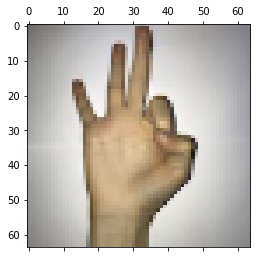

In [47]:
model.evaluate(x_test,y_test)
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
#cm = ts.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

roro = random_state=random.randint(0,len(x_test) - 1)
img = x_test[roro].reshape(64,64,3)
plt.matshow(img,cmap = 'gray')
print(y_predicted_labels[roro])